In [2]:
import pandas as pd
import numpy as np

file_name = 'breast-cancer-wisconsin.txt'
df=pd.read_csv(file_name)

# print(df.columns)
features =  ['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']
label = 'Class'



In [3]:


# Exploratory analysis 
# Summarize the dataset 
df_features = df.loc[:,features]
df_features.describe(include="all")

# Create PCA of features and plot 


# df.loc[:,features]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,15855.000000,15827,15827,15827,15827,15827,15827,15827,15827
unique,NaN,21,19,20,19,19,19,22,14
top,NaN,10,4,3,3,10,3,1,1
freq,NaN,4051,4022,4035,6043,5123,6132,2430,10527
mean,8.263198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.393603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import csv 

def readAndCleanData(file_name):
    x_arr = []
    y_arr = []
    read_file = open(file_name, 'r')
    csv_reader = csv.reader(read_file, delimiter = ',')
    next(csv_reader)
    for row in csv_reader:
        try:
            new_row = [float(i) for i in row[2:]]
        except ValueError:
            continue
        is_filter = filterBadData(new_row)
        if not is_filter:
            x_arr.append(new_row[:-1])
            y_arr.append(convertLabel(new_row[-1]))
    return x_arr, y_arr

def filterBadData(row):
    is_bad = False
    if row[-1] not in (2,4):
        is_bad = True
    for r in row[:-1]:
        if r>10:
            is_bad = True
    return is_bad 

def convertLabel(value):
    if value == 4: # malignant
        return 0
    elif value == 2: #benign
        return 1


file_name = 'breast-cancer-wisconsin.txt'
x_arr, y_arr = readAndCleanData(file_name)


Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')
x-pca pass test


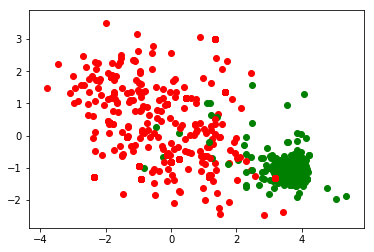

In [68]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt


print(df.columns[2:])

def describeData(x_arr):
    x_pandas = pd.DataFrame(x_arr)
    # summarize dataset 
    display(x_pandas.describe())


# get pca and visualize 
# standardize 
def genPCA(x_pandas):
    x_trans = StandardScaler().fit_transform(x_pandas)
    pca = PCA(n_components=2)
    x_pca = pca.fit_transform(x_trans)
    return x_pca


assert len(x_pca) == len(y_arr)
print('x-pca pass test')

def splitPCA(x_pca):
    # convert to arrays
    pca_1 = []
    pca_2 = []
    for pca in x_pca:
        pca_1.append(pca[0])
        pca_2.append(pca[1])
    return pca_1, pca_2


def plotPCA(x_arr, y_arr):
    colors =['r','g']
    x_pandas = pd.DataFrame(x_arr)
    x_pca = genPCA(x_pandas)
    pca_1, pca_2 = splitPCA(x_pca)
    # plot bene = green and malignant = red  
    for x_val, lab in zip(x_pca, y_arr):
        plt.scatter(x = x_val[0], y = x_val[1], c = colors[lab], label = lab)
    plt.show()


# Dataset seems generally linearly separable 
# with a couple of outliers. Features for malignant cancer seems to have a greater variance 
# then benevolent. If the goal is to maximize recall (reduce misidentifying malignant), 
plotPCA(x_arr, y_arr)


In [58]:
# dAta exploration 


def summarizeDataset(x_arr, y_arr):
    print(max(y_arr))
    print(min(y_arr))
    print(max(x_arr))
    print(min(x_arr))
    print('label count')
    print('  mal:')
    print(y_arr.count(0)) 
    print('  ben:')
    print(y_arr.count(1))
    print('num of obs')
    print(len(y_arr))
    print('num of predictors')
    print(len(x_arr))

    
summarizeDataset(x_arr, y_arr)

1
0
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 4.0, 10.0, 10.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
label count
  mal:
15162
  ben:
442
num of obs
15604
num of predictors
15604


In [1]:
# Logistic Model 
# with SKLearn 

from sklearn.linear_model import LogisticRegression as logistic
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall

def splitTrainTestData(y_arr, x_arr,  test_size = 0.2):
    # split all indices into training and test
    # with a sample size
    y_train, y_test, x_train, x_test = train_test_split(y_arr, x_arr, test_size = test_size)
    return y_train, y_test, x_train, x_test


y_train, y_test, x_train, x_test = splitTrainTestData(y_arr, x_arr)    

NameError: name 'y_arr' is not defined

precision: 0.965909
recall: 0.955056
logistic
mal
3033
ben
88


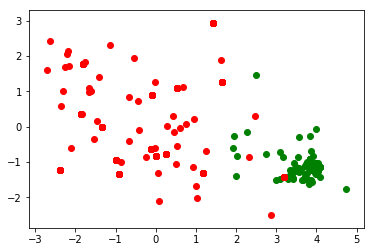

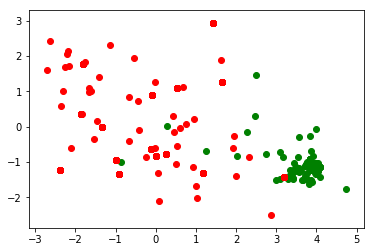

In [70]:
# Logictic Model
model_log = logistic(solver = 'lbfgs')

def predictModel(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    test_precision = precision(y_test, y_pred)
    test_recall = recall(y_test, y_pred)
    print('precision: %f' % test_precision)
    print('recall: %f' % test_recall)
    return model, y_pred
    
def countPredictionCategory(y_pred):
    print('mal')
    print(np.sum(y_pred==0))
    print('ben')
    print(np.sum(y_pred==1))

# performs relatively well with logistic model
# logistic model, automatically assumes prediction ==1 if prob >0.5 in a 2 class model
# might be interesting to tailor the threshold for a model
model, log_pred = predictModel(model_log, x_train, y_train, x_test, y_test)
print('logistic')
countPredictionCategory(log_pred)

plotPCA(x_test, log_pred)
plotPCA(x_test, y_test)

precision: 0.965909
recall: 0.955056
mal
3033
ben
88


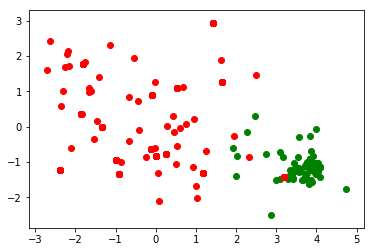

In [71]:
 from sklearn import svm

# SVM Model  with linear kernel, performs the same as logistic regression 
model_svm = svm.SVC(kernel = 'linear')

model, svm_pred = predictModel(model_svm, x_train, y_train, x_test, y_test)
countPredictionCategory(svm_pred)

plotPCA(x_test, svm_pred)


precision: 0.976744
recall: 0.943820
mal
3035
ben
86


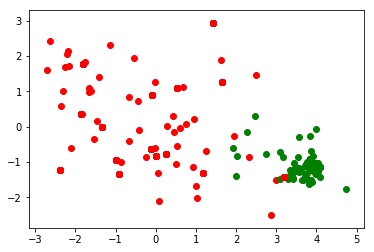

In [128]:
# SVM Model  with  radial basis kernel, does not work as well. Lower recall of benevolent cancer, 
# also disadvantage that threshold cna't be set to 
model_svm = svm.SVC(kernel = 'rbf', gamma = .01)

model, svm_pred = predictModel(model_svm, x_train, y_train, x_test, y_test)
countPredictionCategory(svm_pred)
plotPCA(x_test, svm_pred)


precision: 0.955056
recall: 0.955056
mal
3032
ben
89


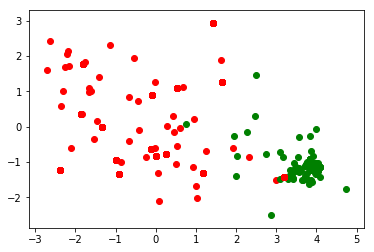

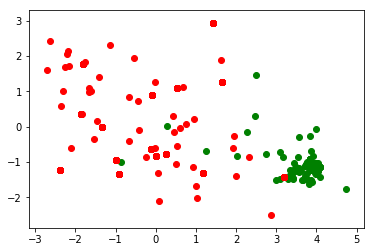

In [94]:
from sklearn import tree
    
# Decision Tree Model  
# This one is the most aggressive at classifying benevolent, suffers from overfitting 
# we may want to use a random forest 
model_decision = tree.DecisionTreeClassifier(max_leaf_nodes=20, max_features = 9)
model_decision, decision_pred = predictModel(model_decision, x_train, y_train, x_test, y_test)
countPredictionCategory(decision_pred)
plotPCA(x_test, decision_pred)
plotPCA(x_test, y_test)


precision: 0.977273
recall: 0.966292
mal
3033
ben
88


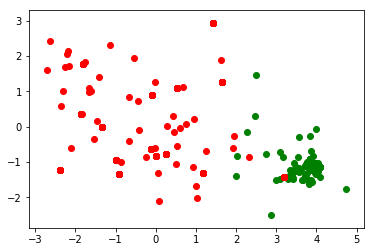

In [108]:
from sklearn.ensemble import RandomForestClassifier 
    
# Random Forest Classifier
model_forest = RandomForestClassifier(max_depth = 10, n_estimators= 40)
model_forest, forest_pred = predictModel(model_forest, x_train, y_train, x_test, y_test)
countPredictionCategory(forest_pred)
plotPCA(x_test, forest_pred)
# plotPCA(x_test, y_test)

precision: 0.977011
recall: 0.955056
mal
3034
ben
87


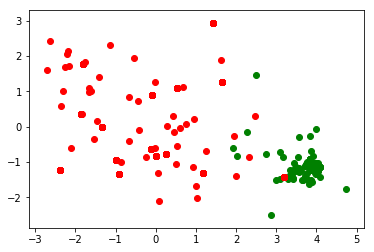

In [126]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier 
    
# Can we use bagging to further improve random forest further
# doesn't seem to work that well in this case 
# we probably don't suffer as much from bias in the estimators 
model_bagging = BaggingClassifier(RandomForestClassifier(n_estimators = 10), max_samples = 0.5, max_features=0.5)
model_bagging, bagging_pred = predictModel(model_bagging, x_train, y_train, x_test, y_test)
countPredictionCategory(bagging_pred)
plotPCA(x_test, bagging_pred)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier



markdown